In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

##  process test.csv and results.csv to be used for evaluation 

In [3]:
test_df = pd.read_csv('recsys_data/test.csv')
results_df = pd.read_csv('recsys_data/results.csv')

In [4]:
test_df.head()

,ip,event_date
0,2038,2019-11-15
1,3226,2019-11-15
2,7495,2019-11-15
3,7750,2019-11-15
4,8026,2019-11-15


In [5]:
results_df.head()

,ip,event_date,0,1,2,3,4,5,6,7,8,9
0,2038,2019-11-15,tcm:526-18025,tcm:526-653510,tcm:526-346380,tcm:526-237984,tcm:526-388698,tcm:526-707567,tcm:526-704480,tcm:526-224772,tcm:526-231792,tcm:526-149043
1,3226,2019-11-15,tcm:526-551763,tcm:526-707527,tcm:526-249921,tcm:526-164352,tcm:526-199040,tcm:526-12167,tcm:526-276414,tcm:526-208086,tcm:526-239640,tcm:526-10787
2,7495,2019-11-15,tcm:526-388698,tcm:526-209028,tcm:526-191289,tcm:526-704480,tcm:526-670542,tcm:526-52560,tcm:526-346380,tcm:526-259315,tcm:526-492865,tcm:526-231792
3,7750,2019-11-15,tcm:526-492865,tcm:526-418532,tcm:526-93195,tcm:526-10787,tcm:526-684643,tcm:526-695181,tcm:526-249037,tcm:526-261006,tcm:526-209028,tcm:526-249921
4,8026,2019-11-15,tcm:526-12167,tcm:526-684643,tcm:526-782343,tcm:526-164352,tcm:526-46242,tcm:526-40469,tcm:526-784445,tcm:526-191289,tcm:526-492865,tcm:526-682379


In [6]:
test_df.nunique()

ip            485254
event_date         1
dtype: int64

In [7]:
results_df.nunique()

ip            485254
event_date         1
0                 66
1                 66
2                 66
3                 66
4                 66
5                 66
6                 66
7                 66
8                 66
9                 66
dtype: int64

In [8]:
pro_test_df = results_df.melt(id_vars=['ip','event_date'], var_name='response_rank',value_name='tcm_id')

In [9]:
pro_test_df = pro_test_df.sort_values(by='ip').reset_index()
pro_test_df = pro_test_df.drop(['index'], axis=1)

In [10]:
pro_test_df['response'] = 1

In [11]:
pro_test_df.head(20)

,ip,event_date,response_rank,tcm_id,response
0,914,2019-11-15,7,tcm:526-239640,1
1,914,2019-11-15,3,tcm:526-551763,1
2,914,2019-11-15,5,tcm:526-46242,1
3,914,2019-11-15,2,tcm:526-782343,1
4,914,2019-11-15,6,tcm:526-16645,1
5,914,2019-11-15,1,tcm:526-388698,1
6,914,2019-11-15,8,tcm:526-204679,1
7,914,2019-11-15,9,tcm:526-209028,1
8,914,2019-11-15,4,tcm:526-655038,1
9,914,2019-11-15,0,tcm:526-40469,1


In [12]:
test_tcm_unique = pro_test_df['tcm_id'].unique()
test_ip_unique = pro_test_df['ip'].unique()

In [13]:
len(test_tcm_unique)

66

In [14]:
test_tcm_unique=pd.DataFrame(test_tcm_unique, columns=['tcm_id'])
test_tcm_unique

,tcm_id
0,tcm:526-239640
1,tcm:526-551763
2,tcm:526-46242
3,tcm:526-782343
4,tcm:526-16645
...,...
61,tcm:526-688510
62,tcm:526-10849
63,tcm:526-418532
64,tcm:526-199040


In [15]:
test_ip_unique=pd.DataFrame(test_ip_unique, columns=['ip'])


In [16]:
test_tcm_unique['event_date'] = '2019-11-15'
test_tcm_unique

,tcm_id,event_date
0,tcm:526-239640,2019-11-15
1,tcm:526-551763,2019-11-15
2,tcm:526-46242,2019-11-15
3,tcm:526-782343,2019-11-15
4,tcm:526-16645,2019-11-15
...,...,...
61,tcm:526-688510,2019-11-15
62,tcm:526-10849,2019-11-15
63,tcm:526-418532,2019-11-15
64,tcm:526-199040,2019-11-15


In [17]:
test_ip_unique['event_date'] = '2019-11-15'
test_ip_unique

,ip,event_date
0,914,2019-11-15
1,1441,2019-11-15
2,1497,2019-11-15
3,1577,2019-11-15
4,1629,2019-11-15
...,...,...
485249,999943882,2019-11-15
485250,999944002,2019-11-15
485251,999944223,2019-11-15
485252,999944538,2019-11-15


In [18]:
test_all_outer = pd.merge(test_ip_unique, test_tcm_unique, on='event_date', how='outer')
test_all_outer

,ip,event_date,tcm_id
0,914,2019-11-15,tcm:526-239640
1,914,2019-11-15,tcm:526-551763
2,914,2019-11-15,tcm:526-46242
3,914,2019-11-15,tcm:526-782343
4,914,2019-11-15,tcm:526-16645
...,...,...,...
32026759,999944699,2019-11-15,tcm:526-688510
32026760,999944699,2019-11-15,tcm:526-10849
32026761,999944699,2019-11-15,tcm:526-418532
32026762,999944699,2019-11-15,tcm:526-199040


In [19]:
test_all_ip_df = pd.merge(test_all_outer, pro_test_df, on=['ip','event_date','tcm_id'], how='left')

In [20]:
test_all_ip_df = test_all_ip_df.drop('response_rank',axis=1)

In [21]:
test_all_ip_df['response'] = test_all_ip_df['response'].fillna(0)

In [22]:
test_all_ip_df['response'] = test_all_ip_df['response'].astype(int)

In [23]:
test_all_ip_df.to_csv('outputs/test_all.csv')

In [24]:
len(test_all_ip_df)

32026764

In [25]:
test_all_ip_df['response'].value_counts(normalize = True)

0    0.848485
1    0.151515
Name: response, dtype: float64

In [26]:
len(test_all_ip_df[test_all_ip_df['response'] == 1])

4852540

In [27]:
len(test_all_ip_df[test_all_ip_df['response'] == 0])

27174224

## explore train.csv

In [97]:
train_df = pd.read_csv('recsys_data/train.csv')

In [85]:
train_df.head()

,ip,event_date,tcm_id,response
0,226074906,2019-05-30,tcm:526-12174,0
1,226074906,2019-05-30,tcm:526-93195,0
2,226074906,2019-05-30,tcm:526-688510,0
3,226074906,2019-05-30,tcm:526-653510,0
4,226074906,2019-05-30,tcm:526-46242,0


In [86]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38805521 entries, 0 to 38805520
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   ip          int64 
 1   event_date  object
 2   tcm_id      object
 3   response    int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ GB


In [87]:
train_df.nunique()

ip            485254
event_date        10
tcm_id            66
response           2
dtype: int64

In [88]:
train_df['response'].value_counts(normalize=True) * 100

0    98.905117
1     1.094883
Name: response, dtype: float64

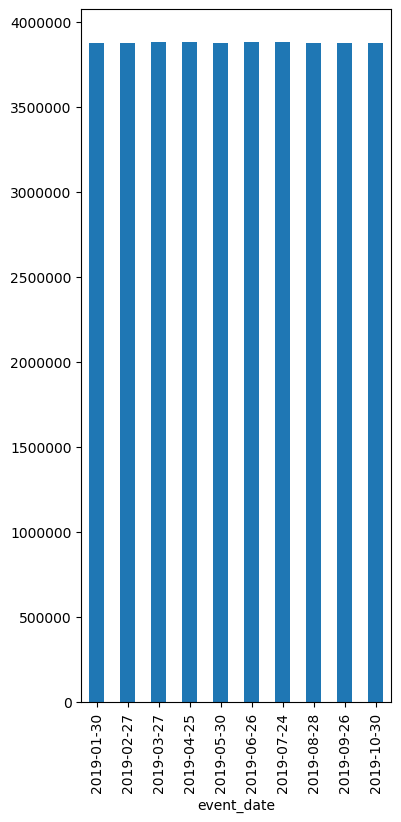

In [89]:
train_df.groupby('event_date').size().plot(kind='bar')

Text(0, 0.5, 'No. of clicks')

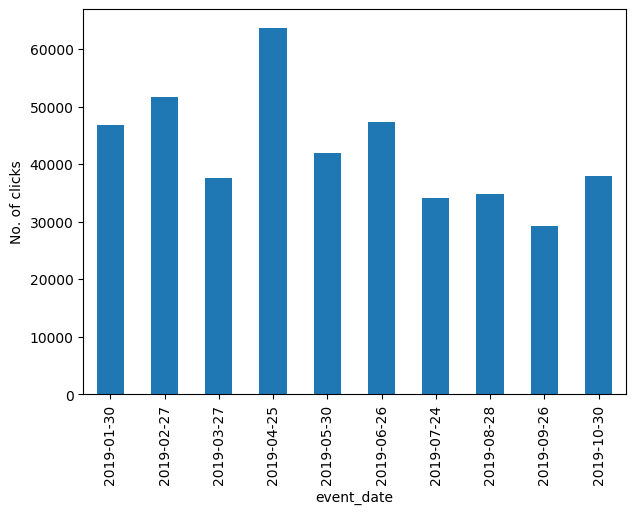

In [90]:
plt.rcParams["figure.figsize"] = (7,5)
train_df[train_df['response'] == 1].groupby('event_date').size().plot(kind='bar')
plt.ylabel('No. of clicks')

In [91]:
tcm_id_list = set(train_df['tcm_id'])
len(tcm_id_list)

66

In [103]:
train_click_df = train_df[train_df['response'] == 1].groupby('ip').size().reset_index(name='num_clicks').copy()
train_click_df.sort_values(by ='num_clicks', inplace = True, ascending = False)
train_click_top1k_df = train_click_df.head(1000)['ip'].copy()
train_click_top1k_df = train_click_top1k_df.reset_index(drop = True)

In [105]:
train_top_1k_df = train_df.merge(train_click_top1k_df.to_frame() , on = 'ip')
train_top_1k_df.nunique()

ip            1000
event_date      10
tcm_id          66
response         2
dtype: int64

In [106]:
train_top_1k_df.head()

,ip,event_date,tcm_id,response
0,226656708,2019-08-28,tcm:526-116442,0
1,226656708,2019-08-28,tcm:526-12174,0
2,226656708,2019-08-28,tcm:526-13782,0
3,226656708,2019-08-28,tcm:526-208086,0
4,226656708,2019-08-28,tcm:526-199040,0


In [107]:
train_top_1k_df['response'].value_counts(normalize=True) * 100

0    87.76248
1    12.23752
Name: response, dtype: float64

In [109]:
test_all_df = pd.read_csv('outputs/test_all.csv')

In [112]:
test_top_1k_df = test_all_df.merge(train_click_top1k_df.to_frame() , on = 'ip')
test_top_1k_df = test_top_1k_df.drop('Unnamed: 0',axis =1)
test_top_1k_df.nunique()

ip            1000
event_date       1
tcm_id          66
response         2
dtype: int64

In [113]:
test_top_1k_df['response'].value_counts(normalize=True) * 100

0    84.848485
1    15.151515
Name: response, dtype: float64

In [115]:
print(len(train_top_1k_df),len(test_top_1k_df))

80768 66000


In [114]:
train_top_1k_df.to_csv('outputs/train_dv5.csv')
test_top_1k_df.to_csv('outputs/test_dv5.csv')

In [46]:
unique_articles = train_df.groupby('ip')['tcm_id'].nunique().reset_index(name='unique_articles')

In [47]:
print(unique_articles['unique_articles'].sum() / len(unique_articles['unique_articles']))
print("Min articles:",unique_articles['unique_articles'].min())
print("Max articles:",unique_articles['unique_articles'].max())

55.75351465418111
Min articles: 41
Max articles: 66


In [48]:
train_df[train_df['response'] == 1].groupby('ip').size().reset_index(name='Number of clicks').groupby('Number of clicks').size().reset_index(name='customer count')

,Number of clicks,customer count
0,1,173292
1,2,51616
2,3,20375
3,4,8635
4,5,4045
5,6,2060
6,7,1015
7,8,616
8,9,310
9,10,196


In [49]:
users_clicks_count_df = train_df[train_df['response'] == 1].groupby(['ip']).size().reset_index(name='click_count')


print('# users with at least 5 interactions: %d' % len(users_clicks_count_df[users_clicks_count_df['click_count'] >= 5]))

# users with at least 5 interactions: 8509


In [50]:

tcm_clicks_count_df = train_df[train_df['response'] == 1].groupby('tcm_id').size().reset_index(name='tcm_click_count').sort_values( ['tcm_click_count'],ascending=False)

In [51]:
tcm_over_time_clicked_df = train_df[train_df['response'] == 1].groupby(['tcm_id','event_date']).size().reset_index(name='tcm_count')
tcm_over_time_clicked_df.to_csv('tcm_over_time_clicked_df.csv')

In [52]:
tcm_over_time_df = train_df.groupby(['tcm_id','event_date']).size().reset_index(name='tcm_count')

In [53]:
tcm_over_time_df.to_csv('tcm_over_time.csv')

In [54]:
tcm_clicks_count_df['tcm_popularity'] = tcm_clicks_count_df['tcm_click_count'] / tcm_clicks_count_df['tcm_click_count'].sum()
tcm_clicks_count_df

,tcm_id,tcm_click_count,tcm_popularity
65,tcm:526-93195,42597,0.100258
17,tcm:526-208086,27593,0.064944
5,tcm:526-12174,23693,0.055765
43,tcm:526-551763,22362,0.052632
22,tcm:526-22867,18931,0.044557
...,...,...,...
46,tcm:526-655038,678,0.001596
29,tcm:526-249921,560,0.001318
42,tcm:526-52560,535,0.001259
19,tcm:526-209216,438,0.001031


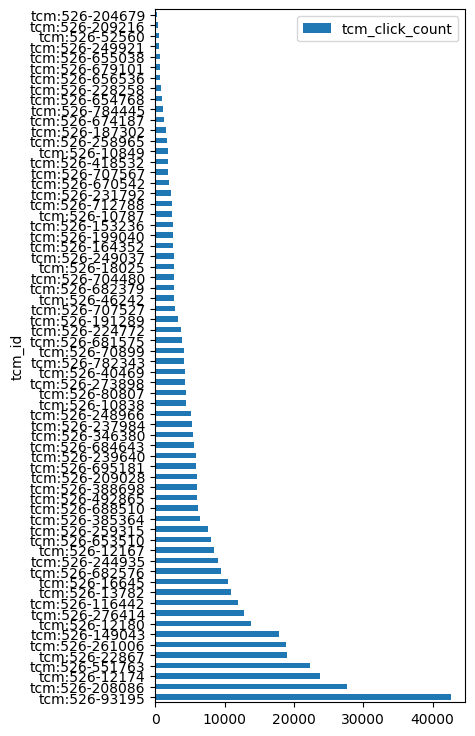

In [56]:

plt.rcParams["figure.figsize"] = (4,9)
tcm_clicks_count_df.plot.barh(x='tcm_id',y='tcm_click_count')

In [22]:
test_df = pd.read_csv('recsys_data/test.csv')
test_df.head()

,ip,event_date
0,2038,2019-11-15
1,3226,2019-11-15
2,7495,2019-11-15
3,7750,2019-11-15
4,8026,2019-11-15


In [23]:
test_df.groupby('event_date').size()

event_date
2019-11-15    485254
dtype: int64

In [24]:
results_df = pd.read_csv('recsys_data/results.csv')
results_df.head()

,ip,event_date,0,1,2,3,4,5,6,7,8,9
0,2038,2019-11-15,tcm:526-18025,tcm:526-653510,tcm:526-346380,tcm:526-237984,tcm:526-388698,tcm:526-707567,tcm:526-704480,tcm:526-224772,tcm:526-231792,tcm:526-149043
1,3226,2019-11-15,tcm:526-551763,tcm:526-707527,tcm:526-249921,tcm:526-164352,tcm:526-199040,tcm:526-12167,tcm:526-276414,tcm:526-208086,tcm:526-239640,tcm:526-10787
2,7495,2019-11-15,tcm:526-388698,tcm:526-209028,tcm:526-191289,tcm:526-704480,tcm:526-670542,tcm:526-52560,tcm:526-346380,tcm:526-259315,tcm:526-492865,tcm:526-231792
3,7750,2019-11-15,tcm:526-492865,tcm:526-418532,tcm:526-93195,tcm:526-10787,tcm:526-684643,tcm:526-695181,tcm:526-249037,tcm:526-261006,tcm:526-209028,tcm:526-249921
4,8026,2019-11-15,tcm:526-12167,tcm:526-684643,tcm:526-782343,tcm:526-164352,tcm:526-46242,tcm:526-40469,tcm:526-784445,tcm:526-191289,tcm:526-492865,tcm:526-682379


In [25]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485254 entries, 0 to 485253
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ip          485254 non-null  int64 
 1   event_date  485254 non-null  object
 2   0           485254 non-null  object
 3   1           485254 non-null  object
 4   2           485254 non-null  object
 5   3           485254 non-null  object
 6   4           485254 non-null  object
 7   5           485254 non-null  object
 8   6           485254 non-null  object
 9   7           485254 non-null  object
 10  8           485254 non-null  object
 11  9           485254 non-null  object
dtypes: int64(1), object(11)
memory usage: 44.4+ MB


In [4]:
articles_df = pd.read_csv('recsys_data/articles.csv')
articles_df.head()

,tcm_id,title,vstopic,vsproduct,topic,product,headline,headlinemedium,headlineshort,teaser,teasershort,teaserlong,text
0,tcm:526-10787,How and why to build a bond ladder,['Investing in Bonds'],['Bonds'],"['Investing strategies', 'Portfolio strategies']","['Bond Ladder Tool', 'Bonds', 'Fixed income', ...",How and why to build a bond ladder,How to build a bond ladder,Need steady income?,Ladders may offer predictable income and rate ...,"Even in uncertain rate environments, bond ladd...",Staggering bond maturities may help to create ...,Key takeaways * Staggering bond maturities ...
1,tcm:526-10838,Inheriting IRAs from someone other than your s...,['Estate Planning'],['Inherited IRA'],"['Asset withdrawals', 'Beneficiaries', 'Distri...","['IRA', 'Inherited IRA', 'RMD Calculator', 'Re...",Inheriting IRAs from someone other than your s...,Nonspousal inherited IRA rules,Nonspousal inherited IRA rules,Understand the new distribution rules for inhe...,Understand the new distribution rules for inhe...,Understand the new distribution rules for inhe...,Key takeaways * The SECURE Act changed the ...
2,tcm:526-10849,Do you really need a bank?,['Financial Planning'],"['Brokerage', 'CDs', 'Cash Management', 'Credi...","['Banking', 'Debt management', 'Saving and spe...",NaN,Do you really need a bank?,Do you really need a bank?,Do you really need a bank?,The answer is not as clear-cut as it once was....,Banks aren't the only game in town when it com...,Mobile banking has made the brick-and-mortar b...,Key takeaways | -----------------------------...
3,tcm:526-116442,Beware of cashing out a 401(k),['Saving for Retirement'],"['401(k)', 'IRA', 'Retirement Accounts', 'Roll...","['Investing strategies', 'Retirement', 'Tax ef...","['401(k)', 'IRA', 'Retirement accounts', 'Roll...",Beware of cashing out a 401(k),Beware of cashing out a 401(k),Beware of cashing out,Evaluate all of your options before cashing ou...,Evaluate all of your options before cashing ou...,It might be tempting to withdraw some money wh...,Key takeaways * There can be an immediate c...
4,tcm:526-12167,Smart strategies for required distributions,"['Living in Retirement', 'Required Minimum Dis...",['IRA'],"['Asset withdrawals', 'Charitable giving', 'Di...","['529 plans', 'Cash Management Account', 'IRA'...",Smart strategies for required distributions,Smart IRA withdrawal strategies,Smart IRA withdrawal strategies,Answer 4 key questions to help you manage RMD ...,Answer 4 questions to help you use required mi...,See 4 key questions to answer to help you mana...,Key takeaways * You may not need your RMDs ...


In [5]:
articles_df['all_text'] = articles_df['headline']+' '+articles_df['teaser']+' '+articles_df['text']

In [6]:
articles_df = articles_df.loc[:,['tcm_id','vstopic','vsproduct','topic','product','headline','all_text']]
articles_df.head()

,tcm_id,vstopic,vsproduct,topic,product,headline,all_text
0,tcm:526-10787,['Investing in Bonds'],['Bonds'],"['Investing strategies', 'Portfolio strategies']","['Bond Ladder Tool', 'Bonds', 'Fixed income', ...",How and why to build a bond ladder,How and why to build a bond ladder Ladders may...
1,tcm:526-10838,['Estate Planning'],['Inherited IRA'],"['Asset withdrawals', 'Beneficiaries', 'Distri...","['IRA', 'Inherited IRA', 'RMD Calculator', 'Re...",Inheriting IRAs from someone other than your s...,Inheriting IRAs from someone other than your s...
2,tcm:526-10849,['Financial Planning'],"['Brokerage', 'CDs', 'Cash Management', 'Credi...","['Banking', 'Debt management', 'Saving and spe...",NaN,Do you really need a bank?,Do you really need a bank? The answer is not a...
3,tcm:526-116442,['Saving for Retirement'],"['401(k)', 'IRA', 'Retirement Accounts', 'Roll...","['Investing strategies', 'Retirement', 'Tax ef...","['401(k)', 'IRA', 'Retirement accounts', 'Roll...",Beware of cashing out a 401(k),Beware of cashing out a 401(k) Evaluate all of...
4,tcm:526-12167,"['Living in Retirement', 'Required Minimum Dis...",['IRA'],"['Asset withdrawals', 'Charitable giving', 'Di...","['529 plans', 'Cash Management Account', 'IRA'...",Smart strategies for required distributions,Smart strategies for required distributions An...


In [28]:
articles_merged_df = pd.merge(articles_df, tcm_clicks_count_df, how="outer", on=["tcm_id"])
articles_merged_df.head()

,tcm_id,vstopic,vsproduct,topic,product,headline,all_text,tcm_click_count,tcm_popularity
0,tcm:526-10787,['Investing in Bonds'],['Bonds'],"['Investing strategies', 'Portfolio strategies']","['Bond Ladder Tool', 'Bonds', 'Fixed income', ...",How and why to build a bond ladder,How and why to build a bond ladder Ladders may...,2451.0,0.005769
1,tcm:526-10838,['Estate Planning'],['Inherited IRA'],"['Asset withdrawals', 'Beneficiaries', 'Distri...","['IRA', 'Inherited IRA', 'RMD Calculator', 'Re...",Inheriting IRAs from someone other than your s...,Inheriting IRAs from someone other than your s...,4473.0,0.010528
2,tcm:526-10849,['Financial Planning'],"['Brokerage', 'CDs', 'Cash Management', 'Credi...","['Banking', 'Debt management', 'Saving and spe...",NaN,Do you really need a bank?,Do you really need a bank? The answer is not a...,1764.0,0.004152
3,tcm:526-116442,['Saving for Retirement'],"['401(k)', 'IRA', 'Retirement Accounts', 'Roll...","['Investing strategies', 'Retirement', 'Tax ef...","['401(k)', 'IRA', 'Retirement accounts', 'Roll...",Beware of cashing out a 401(k),Beware of cashing out a 401(k) Evaluate all of...,11967.0,0.028166
4,tcm:526-12167,"['Living in Retirement', 'Required Minimum Dis...",['IRA'],"['Asset withdrawals', 'Charitable giving', 'Di...","['529 plans', 'Cash Management Account', 'IRA'...",Smart strategies for required distributions,Smart strategies for required distributions An...,8422.0,0.019822


In [29]:
len(articles_merged_df)
tcm_ids_articles = set(articles_merged_df['tcm_id'])

In [30]:
tcm_ids_articles - tcm_id_list

{'tcm:526-12173',
 'tcm:526-161967',
 'tcm:526-387709',
 'tcm:526-635549',
 'tcm:526-766928'}

In [31]:
cold_tcm_ids = ['tcm:526-12173','tcm:526-161967','tcm:526-387709','tcm:526-635549','tcm:526-766928']

In [32]:
articles_merged_df = articles_merged_df[~articles_merged_df['tcm_id'].isin(cold_tcm_ids)]

In [33]:
articles_merged_df.sort_values(by=['tcm_popularity'],inplace=True,ascending=False)
articles_merged_df.head(10)
top_10_popular_tcm = articles_merged_df['tcm_id'].head(10).values

In [34]:
articles_merged_df['rank'] = articles_merged_df['tcm_popularity'].rank(ascending=False)
articles_merged_df.head(10)

,tcm_id,vstopic,vsproduct,topic,product,headline,all_text,tcm_click_count,tcm_popularity,rank
70,tcm:526-93195,['Living in Retirement'],"['Long-Term Care Insurance', 'Planning and Gui...","['Economic insights', 'Investing strategies', ...","['Annuities', 'Health Savings Account', 'Long-...",5 ways to help protect retirement income,5 ways to help protect retirement income These...,42597.0,0.100258,1.0
19,tcm:526-208086,['Saving for Retirement'],"['401(k)', '403(b)', '457', 'IRA']",['Retirement'],"['Annuities', 'Retirement accounts', 'Retireme...",How much do I need to retire?,How much do I need to retire? Fidelity's rule ...,27593.0,0.064944,2.0
6,tcm:526-12174,['Living in Retirement'],"['401(k)', '403(b)', 'Retirement Accounts']",['Living in retirement'],"['401(k)', '403(b)', 'Retirement accounts']",Should you take Social Security at 62?,Should you take Social Security at 62? If you ...,23693.0,0.055765,3.0
46,tcm:526-551763,['Taxes'],NaN,"['Income tax', 'Required minimum distributions...","['IRA', 'RMD Calculator', 'Social Security Ben...",Tax reform and retirees,Tax reform and retirees New tax deduction and ...,22362.0,0.052632,4.0
24,tcm:526-22867,"['Living in Retirement', 'Social Security']","['401(k)', '403(b)', 'Retirement Accounts']","['Retirement', 'Social Security']","['Annuities', 'Retirement accounts', 'Retireme...",Social Security tips for couples,Social Security tips for couples See 3 ways th...,18931.0,0.044557,5.0
34,tcm:526-261006,['Investing Strategies'],NaN,NaN,NaN,6 habits of successful investors,"6 habits of successful investors Planning, con...",18902.0,0.044488,6.0
9,tcm:526-149043,"['Estate Planning', 'Wealth Planning']","['Estate Account', 'Insurance', 'Trusts']","['Family', 'Planning your estate', 'Wealth pla...","['Estate planning', 'FidSafe', 'Fidelity Estat...",An all-in-one wealth transfer checklist,An all-in-one wealth transfer checklist Talk w...,17901.0,0.042132,7.0
7,tcm:526-12180,['Getting Ready to Retire'],['Annuities'],"['Retirement', 'Investing strategies']","['Annuities', 'Retirement accounts', 'Retireme...",Create income that can last a lifetime,Create income that can last a lifetime Generat...,13749.0,0.032360,8.0
36,tcm:526-276414,['Online Security'],['Brokerage'],"['Charitable giving', 'Identity theft', 'Onlin...","['Charitable Planning Calculator', 'Charitable...",Prevent ID theft: Avoid financial scams,Prevent ID theft: Avoid financial scams Follow...,12816.0,0.030164,9.0
3,tcm:526-116442,['Saving for Retirement'],"['401(k)', 'IRA', 'Retirement Accounts', 'Roll...","['Investing strategies', 'Retirement', 'Tax ef...","['401(k)', 'IRA', 'Retirement accounts', 'Roll...",Beware of cashing out a 401(k),Beware of cashing out a 401(k) Evaluate all of...,11967.0,0.028166,10.0


In [35]:
articles_merged_df = articles_merged_df.reset_index(drop=True)
articles_merged_df.head()

,tcm_id,vstopic,vsproduct,topic,product,headline,all_text,tcm_click_count,tcm_popularity,rank
0,tcm:526-93195,['Living in Retirement'],"['Long-Term Care Insurance', 'Planning and Gui...","['Economic insights', 'Investing strategies', ...","['Annuities', 'Health Savings Account', 'Long-...",5 ways to help protect retirement income,5 ways to help protect retirement income These...,42597.0,0.100258,1.0
1,tcm:526-208086,['Saving for Retirement'],"['401(k)', '403(b)', '457', 'IRA']",['Retirement'],"['Annuities', 'Retirement accounts', 'Retireme...",How much do I need to retire?,How much do I need to retire? Fidelity's rule ...,27593.0,0.064944,2.0
2,tcm:526-12174,['Living in Retirement'],"['401(k)', '403(b)', 'Retirement Accounts']",['Living in retirement'],"['401(k)', '403(b)', 'Retirement accounts']",Should you take Social Security at 62?,Should you take Social Security at 62? If you ...,23693.0,0.055765,3.0
3,tcm:526-551763,['Taxes'],NaN,"['Income tax', 'Required minimum distributions...","['IRA', 'RMD Calculator', 'Social Security Ben...",Tax reform and retirees,Tax reform and retirees New tax deduction and ...,22362.0,0.052632,4.0
4,tcm:526-22867,"['Living in Retirement', 'Social Security']","['401(k)', '403(b)', 'Retirement Accounts']","['Retirement', 'Social Security']","['Annuities', 'Retirement accounts', 'Retireme...",Social Security tips for couples,Social Security tips for couples See 3 ways th...,18931.0,0.044557,5.0


 Embeddings (TextWiser , Sentence Transformer)

In [78]:
# from textwiser import TextWiser, Embedding, Transformation, WordOptions, PoolOptions

# doc_embeddings_schema = {
#     'transform': [
#         {
#             'concat': [
#                 {
#                     "transform": [
#                         ["flair", {"pretrained": "news-forward-fast"}],
#                         ["pool", {"pool_option": "max"}]
#                     ]
#                 },
#                 {
#                     "transform": [
#                         "tfidf",
#                         ["pool", {"pool_option": "max"}]
#                     ]
#                 }
#             ]
#         },
#         ('nmf', { 'n_components': 30 })
#     ]
# }

# doc_embeddings = TextWiser(Embedding.Compound(schema=doc_embeddings_schema))
# doc_embeddings

# # articles_emb_textiwser1 = doc_embeddings.fit_transform(articles_merged_df['all_text'].values.astype('U'))

# # emb = TextWiser(Embedding.Word(word_option=WordOptions.bert), Transformation.Pool(pool_option=PoolOptions.max))
# # articles_emb_textiwser = emb.fit_transform(articles_merged_df['all_text'].values.astype('U'))

# # articles_emb_textiwser.shape

Sentence Transformer

In [ ]:
from sentence_transformers import SentenceTransformer, util
from sklearn.decomposition import PCA


model = SentenceTransformer('all-MiniLM-L6-v2')
model.max_seq_length = 512

# #Compute embeddings
# embeddings = model.encode(articles_merged_df['all_text'].values.astype('U'), convert_to_tensor=False)
# type(embeddings)

# pca = PCA(n_components=30, random_state=0)
# pca.fit(embeddings)

# all_text_emb_pca = pca.transform(embeddings)


In [38]:
import umap
all_text_emb_umap = umap.UMAP(n_neighbors=20, n_components=30, metric='cosine').fit_transform(embeddings)

In [39]:
#Compute embeddings
# embeddings = model.encode(articles_merged_df['all_text'].values.astype('U'), convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(all_text_emb_umap, all_text_emb_umap)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

df_article_pair_umap = pd.DataFrame(columns=['tcm_id_a','headline_a','rank_a','tcm_id_b','headline_b','rank_b','score'])

for pair in pairs[0:10]:
    i, j = pair['index']
    row_dic = {'tcm_id_a': articles_merged_df['tcm_id'].values.astype('U')[i],
                            'headline_a': articles_merged_df['headline'].values.astype('U')[i],
                            'rank_a': articles_merged_df['rank'].values.astype('U')[i],
                            'tcm_id_b': articles_merged_df['tcm_id'].values.astype('U')[j],
                            'headline_b' : articles_merged_df['headline'].values.astype('U')[j],
                            'rank_b': articles_merged_df['rank'].values.astype('U')[j],
                            'score': pair['score'].item()}
    df_article_pair_umap = df_article_pair_umap.append(row_dic,ignore_index=True)
    



In [40]:
# df_article_pair

In [41]:
# df_article_pair_umap

In [42]:
# df_article_pair_pca

In [43]:

import torch

# Corpus with example sentences
corpus = articles_merged_df['all_text'].values.astype('U')

corpus_embeddings = model.encode(corpus, convert_to_tensor=True)

# Query:
queries = articles_merged_df[:3]


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for key,query in enumerate(queries['all_text'].values.astype('U')):
    query_embedding = model.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", queries['tcm_id'].iloc[[key]].values[0], queries['headline'].iloc[[key]].values[0])
    print("\nTop 5 most similar articles :")

    for score, idx in zip(top_results[0], top_results[1]):
        print(articles_merged_df['tcm_id'].values.astype('U')[idx], 
              articles_merged_df['headline'].values.astype('U')[idx], 
              "(Score: {:.4f})".format(score),
              "Popularity Rank : ",articles_merged_df['rank'].values.astype('U')[idx])





Query: tcm:526-93195 5 ways to help protect retirement income

Top 5 most similar articles :
tcm:526-93195 5 ways to help protect retirement income (Score: 1.0000) Popularity Rank :  1.0
tcm:526-249037 How to plan for rising health care costs (Score: 0.8270) Popularity Rank :  43.0
tcm:526-164352 50/15/5: a saving and spending rule of thumb (Score: 0.7236) Popularity Rank :  44.0
tcm:526-684643 How much will you spend in retirement? (Score: 0.7193) Popularity Rank :  25.0
tcm:526-208086 How much do I need to retire? (Score: 0.7166) Popularity Rank :  2.0




Query: tcm:526-208086 How much do I need to retire?

Top 5 most similar articles :
tcm:526-208086 How much do I need to retire? (Score: 1.0000) Popularity Rank :  2.0
tcm:526-209216 4 rules of thumb for retirement savings (Score: 0.8794) Popularity Rank :  65.0
tcm:526-209028 What will my savings cover in retirement? (Score: 0.7917) Popularity Rank :  22.0
tcm:526-684643 How much will you spend in retirement? (Score: 0.7570) Po

In [ ]:
import hdbscan
import umap


umap_embeddings = umap.UMAP(n_neighbors=7, n_components=5, metric='cosine').fit_transform(corpus_embeddings)

# pca = PCA(n_components=30, random_state=0)
# pca.fit(embeddings)
# all_text_emb_pca = pca.transform(embeddings)

cluster = hdbscan.HDBSCAN(min_cluster_size=3,metric='euclidean',cluster_selection_method='eom').fit(umap_embeddings)
# Prepare data
umap_data = umap.UMAP(n_neighbors=3, n_components=2, min_dist=0.0, metric='cosine').fit_transform(corpus_embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_
# Visualize clusters
# fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD')
plt.scatter(clustered.x, clustered.y, c=clustered.labels,  cmap='hsv_r')

In [44]:


umap_embeddings = umap.UMAP(n_neighbors=7, 
                            n_components=5, 
                            metric='cosine').fit_transform(corpus_embeddings)

In [45]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=3,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [46]:
# Prepare data
umap_data = umap.UMAP(n_neighbors=3, n_components=2, min_dist=0.0, metric='cosine').fit_transform(corpus_embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

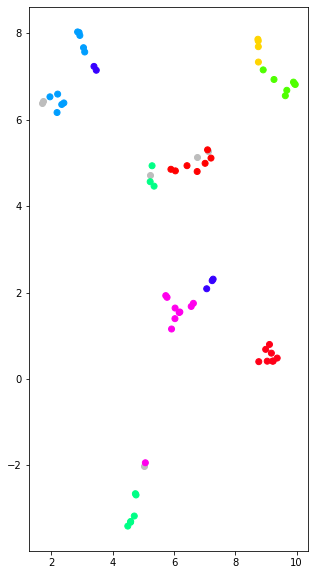

In [47]:


# Visualize clusters
# fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD')
plt.scatter(clustered.x, clustered.y, c=clustered.labels,  cmap='hsv_r')

Modeling

In [58]:
train_clicked_df = train_df.groupby('response', group_keys=False).apply(lambda x: x.sample(n=100000))

In [59]:
train_sample_df = train_clicked_df.copy()

In [60]:
train_sample_df.nunique()

ip            160373
event_date        10
tcm_id            66
response           2
dtype: int64

In [62]:
train_sample_df.response.value_counts(normalize=True)

1    0.5
0    0.5
Name: response, dtype: float64

In [61]:
train_sample_df.isna().sum()

ip            0
event_date    0
tcm_id        0
response      0
dtype: int64

In [63]:
len(articles_merged_df['all_text'][4])

9599

In [60]:
users_df = pd.read_csv("recsys_data/users.csv")
users_df.head(10)

,ip,event_date,age,gender,covered_indic,tot_pi_amt,has_workplace,has_fili,has_pas,equity_trd_cnt,ret_only_indic,web_sessions_cnt,branch_appts_cnt,rep_calls_cnt,pgc_tam
0,2395,2019-01-01 00:00:00,65.0,M,1,1645230.02,0,0,0,10,0,689,1,2,Growth with Income
1,3196,2019-01-01 00:00:00,56.0,M,1,50343.26,1,0,0,0,0,146,2,1,Growth
2,5992,2019-01-01 00:00:00,75.0,M,1,831047.28,0,0,0,0,0,61,0,3,Growth
3,6807,2019-01-01 00:00:00,66.0,M,1,2026257.86,0,0,0,19,0,393,0,1,Balanced
4,11538,2019-01-01 00:00:00,62.0,F,1,1096917.32,0,0,1,27,0,1529,0,0,Balanced
5,12350,2019-01-01 00:00:00,56.0,M,0,413751.98,0,0,0,0,0,4,0,0,Aggressive Growth
6,13032,2019-01-01 00:00:00,35.0,F,0,98639.60,0,0,0,0,0,11,0,0,Aggressive Growth
7,14944,2019-01-01 00:00:00,65.0,M,1,2567031.83,0,0,0,2,0,289,0,0,Growth
8,21149,2019-01-01 00:00:00,64.0,M,0,305520.02,1,0,0,0,0,282,0,0,Growth with Income
9,24510,2019-01-01 00:00:00,60.0,M,1,2214043.53,0,0,0,0,0,383,4,1,Conservative


In [61]:
users_df.isnull().sum()

ip                     0
event_date             0
age                 1728
gender              1402
covered_indic          0
tot_pi_amt             0
has_workplace          0
has_fili               0
has_pas                0
equity_trd_cnt         0
ret_only_indic         0
web_sessions_cnt       0
branch_appts_cnt       0
rep_calls_cnt          0
pgc_tam                0
dtype: int64

In [62]:
from sklearn.impute import SimpleImputer
mean_imputer_age = SimpleImputer(strategy='median')
mean_imputer_gender = SimpleImputer(strategy='most_frequent')
users_df['age'] = mean_imputer_age.fit_transform(users_df['age'].values.reshape(-1,1))
users_df['gender'] = mean_imputer_gender.fit_transform(users_df['gender'].values.reshape(-1,1))


In [63]:
users_df.isnull().sum()

ip                  0
event_date          0
age                 0
gender              0
covered_indic       0
tot_pi_amt          0
has_workplace       0
has_fili            0
has_pas             0
equity_trd_cnt      0
ret_only_indic      0
web_sessions_cnt    0
branch_appts_cnt    0
rep_calls_cnt       0
pgc_tam             0
dtype: int64

In [69]:
list(users_df['gender'].unique())

['M ', 'F ', '? ', '* ']

In [72]:
enval = list(users_df['gender'].unique()) + list(users_df['pgc_tam'].unique())
enval

[3,
 2,
 1,
 0,
 'Growth with Income',
 'Growth',
 'Balanced',
 'Aggressive Growth',
 'Conservative',
 'Moderate with Income',
 'Moderate',
 'Most Aggressive',
 'Short Term',
 'All Equity',
 'None']

In [73]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


label_encoder.fit(enval)
# Encode labels in column 'species'.
users_df['gender']= label_encoder.transform(users_df['gender'])
users_df['pgc_tam']= label_encoder.transform(users_df['pgc_tam'])
  


In [77]:
# users_df.drop('event_date', axis=1, inplace=True)
users_df.to_csv('outputs/users_.csv')

In [68]:
users_df.nunique()

ip                  485254
event_date               1
age                     92
gender                   4
covered_indic            2
tot_pi_amt          460924
has_workplace            2
has_fili                 2
has_pas                  2
equity_trd_cnt        1205
ret_only_indic           2
web_sessions_cnt      2228
branch_appts_cnt        24
rep_calls_cnt          168
pgc_tam                 11
dtype: int64

In [69]:
train_sample_users_df = train_sample_df.merge(users_df.loc[:,~users_df.columns.isin(['event_date'])],on='ip')

In [112]:
train_sample_users_article_df = train_sample_users_df.merge(articles_merged_df.loc[:,articles_merged_df.columns.isin(['tcm_id','vstopic','rank','all_text_len'])],on='tcm_id')

In [113]:
articles_merged_df.nunique()

tcm_id             66
vstopic            27
vsproduct          41
topic              60
product            55
headline           65
all_text           64
tcm_click_count    66
tcm_popularity     66
rank               66
all_text_len       64
dtype: int64

In [114]:
articles_merged_df['all_text_len']  = articles_merged_df['all_text'].str.len()

In [115]:
articles_merged_df['all_text_len'].describe()

count       64.000000
mean      9372.250000
std       3003.429225
min       4847.000000
25%       7132.500000
50%       8656.500000
75%      10986.250000
max      20587.000000
Name: all_text_len, dtype: float64